## McDonald's dataset

About Dataset
McDonald's dataset contains information about ech product in the McDonald's menu.
It gives information about the proteins, calories, energy, sugar levels, etc. in each and every product in the McDonald's menu.

In [1]:
#import some lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import the file
df=pd.read_csv(r"F:\data analytics\mcd.csv",encoding='latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          42 non-null     object 
 1   serving_size  42 non-null     object 
 2   ingredients   36 non-null     object 
 3   tag           36 non-null     object 
 4   allergy       42 non-null     object 
 5   energy        42 non-null     float64
 6   protein       42 non-null     float64
 7   total_fat     42 non-null     float64
 8   sat_fat       42 non-null     float64
 9   trans_fat     42 non-null     float64
 10  chol          42 non-null     float64
 11  carbs         42 non-null     float64
 12  total_sugar   42 non-null     float64
 13  added_sugar   42 non-null     float64
 14  sodium        42 non-null     float64
 15  description   42 non-null     object 
dtypes: float64(10), object(6)
memory usage: 5.4+ KB


In [4]:
df.describe()

,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,327.503810,10.251667,13.980095,6.457143,0.125238,21.062619,39.231857,13.296905,9.305714,474.297857
std,206.453133,10.042711,11.748440,5.208211,0.111994,28.125409,21.680327,14.939201,12.297709,472.896404
min,6.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000,0.000000,0.000000,0.000000
25%,176.622500,2.832500,5.790000,3.670000,0.060000,2.840000,23.632500,2.922500,1.080000,85.770000
50%,306.245000,6.335000,11.375000,5.065000,0.100000,6.585000,39.305000,8.565000,5.175000,309.770000
75%,401.737500,15.340000,18.807500,8.125000,0.175000,31.740000,51.207500,17.287500,12.902500,709.437500
max,832.670000,47.600000,46.900000,21.110000,0.590000,115.000000,117.780000,66.930000,55.160000,1854.710000


In [5]:
df.shape

(42, 16)

In [6]:
df.columns

Index(['name', 'serving_size', 'ingredients', 'tag', 'allergy', 'energy',
       'protein', 'total_fat', 'sat_fat', 'trans_fat', 'chol', 'carbs',
       'total_sugar', 'added_sugar', 'sodium', 'description'],
      dtype='object')

In [7]:
# to find missing value 
df.isnull().sum()

name            0
serving_size    0
ingredients     6
tag             6
allergy         0
energy          0
protein         0
total_fat       0
sat_fat         0
trans_fat       0
chol            0
carbs           0
total_sugar     0
added_sugar     0
sodium          0
description     0
dtype: int64

In [28]:
df_means = df.groupby('name').agg('mean')
df_means.style.background_gradient(cmap='Blues')

,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium
name,,,,,,,,,,
Black CoffeeÂ®,6.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000,0.000000,0.000000,0.000000
Butter Chicken Grilled Burger,357.010000,17.060000,14.410000,4.650000,0.000000,31.930000,39.760000,6.550000,4.710000,919.590000
Butter Paneer Grilled Burger,382.260000,12.850000,17.150000,8.290000,0.000000,6.620000,44.120000,8.780000,5.080000,900.370000
Cheesy Fries,453.920000,7.190000,21.100000,10.640000,0.590000,3.890000,41.940000,0.950000,0.400000,430.790000
Chicken Maharaja MacÂ®,689.120000,34.000000,36.690000,10.330000,0.250000,81.490000,55.390000,8.920000,6.140000,1854.710000
Chicken McNuggetsÂ®,403.017500,23.807500,23.051000,10.565000,0.150000,58.032500,24.935000,0.805000,0.000000,744.482500
Cold Coffee McfloatÂ®,270.050000,5.910000,7.180000,4.890000,0.000000,15.810000,45.440000,36.180000,19.980000,173.590000
Cold CoffeeÂ®,301.100000,9.750000,11.150000,7.450000,0.000000,27.400000,40.200000,37.500000,21.250000,175.000000
Dosa Masala BurgerÂ®,340.230000,5.660000,12.390000,4.220000,0.000000,0.000000,51.520000,12.680000,6.400000,710.540000


<AxesSubplot:>

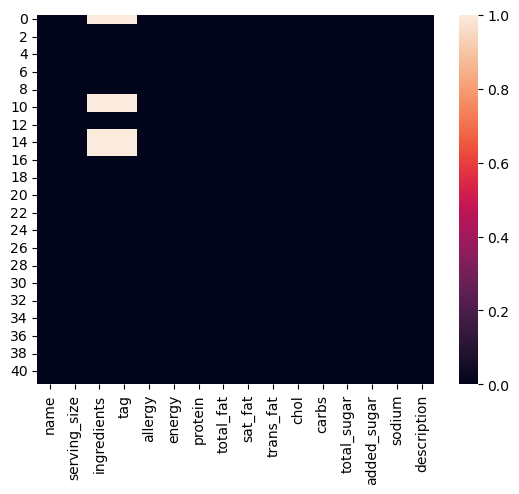

In [8]:
sns.heatmap(df.isnull())

there are some missing values in ingredients and tag

In [9]:
# finding duplicates
df[df.duplicated()]

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description


there are no duplicates values

## How much protein has a McVeggieÂ®

In [10]:
df[(df['name'] == 'McVeggieÂ®')].groupby(['name','protein']).size().reset_index().rename(columns={0:'Count'})

,name,protein,Count
0,McVeggieÂ®,10.24,1


McVeggieÂ has 10.24g Protein

## Nutrition value of McAloo Tikki BurgerÂ®

In [11]:
df[(df['name'] == 'McAloo Tikki BurgerÂ®')]

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description
16,McAloo Tikki BurgerÂ®,146g,"Regular bun crown, Tom-Mayo sauce, Sliced toma...",The one that never goes out of f(l)avour.,"Cereal containing gluten, Milk, Soya",339.52,8.5,11.31,4.27,0.2,1.47,50.27,7.05,4.07,545.34,A golden fried vegetarian patty prepared with ...


these are the Nutrition values of McAloo Tikki Burger

## How much carbs has a Cheesy Fries

In [12]:
df[(df['name'] == 'Cheesy Fries')].groupby(['name','carbs']).size().reset_index().rename(columns={0:'Count'})

,name,carbs,Count
0,Cheesy Fries,41.94,1


Cheesy fries has 41.94g carbs

## What is the serving size of Cold CoffeeÂ®

In [13]:
df[(df['name'] == 'Cold CoffeeÂ®')].groupby(['name','serving_size']).size().reset_index().rename(columns={0:'Count'})

,name,serving_size,Count
0,Cold CoffeeÂ®,250ml,1


Cold Coffee has 250ml of serving size

## Which food has highest energy

In [14]:
df.energy.max()

832.67

In [15]:
df[(df['energy'] == 832.67 )]

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description
40,Veg Maharaja MacÂ®,306g,"Maharaja bun crown, Cocktail sauce, Shredded l...",A feast fit for kings (and queens).,"Cereal containing gluten, Milk, Soya",832.67,24.17,37.94,16.83,0.28,36.19,93.84,11.52,6.92,1529.22,\n A double-dec...


Veg Maharaja Mac has highest energy

## Which food has highest protein 

In [16]:
df.protein.max()

47.6

In [17]:
df[(df['protein'] == 47.6 )]

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description
7,Chicken McNuggetsÂ®,320g,Chicken bites,Each bite is better than the last.,Cereal containing gluten,806.1,47.6,46.9,21.11,0.3,115.0,49.88,1.7,0.0,1490.0,"Bite-sized pieces of breaded, boneless chicken..."


Chicken McNuggets has highest protein 

## Which food has highest sugar

In [18]:
df.total_sugar.max()

66.93

In [19]:
df[(df['total_sugar'] == 66.93 )]

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description
19,McFlurry (Choco Crunch)Â®,167.38g,"Milk fat, Chocolate",Burgers aren't the only things we're good at.,"Milk, Soya",703.17,10.99,19.68,13.8,0.21,11.06,117.78,66.93,54.51,295.89,Milk-based frozen dessert with chocolate crisp...


McFlurry (Choco Crunch) has highest amount of sugar

## Which food or drink has No Allergens 

In [20]:
df[(df['allergy'] == 'No Allergens' )]

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description
0,Black CoffeeÂ®,200ml,NaN,NaN,No Allergens,6.80,0.00,0.00,0.00,0.00,0.00,1.70,0.00,0.00,0.00,Perfectly brewed for any time of the day.
13,Iced TeaÂ®,400ml,NaN,NaN,No Allergens,242.52,1.08,0.12,0.00,0.00,0.00,59.28,58.08,55.16,16.68,A blend of aromatic tea and the fruity flavour...
27,Our World Famous FriesÂ®,77g,Potato and salt,The legend among legends.,No Allergens,224.59,3.38,10.39,4.97,0.08,0.77,27.08,0.39,0.00,153.15,"The crisp, craveable, fan favourite: our World..."
28,Our World Famous FriesÂ®,154g,Potato and salt,The legend among legends.,No Allergens,449.17,6.76,20.77,9.95,0.15,1.54,54.16,0.77,0.00,306.29,"The crisp, craveable, fan favourite: our World..."
29,Our World Famous FriesÂ®,109g,Potato and salt,The legend among legends.,No Allergens,317.92,4.79,14.70,7.04,0.11,1.09,38.34,0.55,0.00,216.79,"The crisp, craveable, fan favourite: our World..."


These five food has no allergens

## which food are high energy and low total fat

In [21]:
df[  (df['energy'] >= 500 ) & (df['total_fat'] <= 20 )  ]

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description
19,McFlurry (Choco Crunch)Â®,167.38g,"Milk fat, Chocolate",Burgers aren't the only things we're good at.,"Milk, Soya",703.17,10.99,19.68,13.8,0.21,11.06,117.78,66.93,54.51,295.89,Milk-based frozen dessert with chocolate crisp...


McFlurry (Choco Crunch) contains high energy and low fat

## Which food are equal in protein and carbs

In [22]:
df[  (df['protein'] >= 10 ) & (df['carbs'] <= 20 )  ]

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description
5,Chicken McNuggetsÂ®,64g,Chicken bites,Each bite is better than the last.,Cereal containing gluten,169.68,10.03,9.544,4.45,0.06,24.66,10.50,0.32,0.0,313.25,"Bite-sized pieces of breaded, boneless chicken..."
6,Chicken McNuggetsÂ®,96g,Chicken bites,Each bite is better than the last.,Cereal containing gluten,254.52,15.04,14.300,6.68,0.10,36.99,15.74,0.48,0.0,469.87,"Bite-sized pieces of breaded, boneless chicken..."


Chicken McNuggets are equal in protein are carbs

## which food had tag of 'Dil se makhani burger'

In [23]:
df[(df['tag'] == "Dil se makhani burger." )]

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description
1,Butter Chicken Grilled Burger,153g,"Premium grilled chicken patty, Shredded onion,...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",357.01,17.06,14.41,4.65,0.0,31.93,39.76,6.55,4.71,919.59,Premium grilled chicken patty topped with makh...
2,Butter Paneer Grilled Burger,142g,"Mildly spiced grilled paneer patty, Shredded o...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",382.26,12.85,17.15,8.29,0.0,6.62,44.12,8.78,5.08,900.37,Mildly spiced grilled paneer patty topped with...


Here are two food that has tag of 'Dil se makhani burger'